15/10

Observação: Esse algoritmo não é bom para o caso de fazer atualizações da envoltória ao adicionar um ponto.

A implementação até agora não funciona porque o algoritmo volta no primeiro ponto na primeira iteração.

19/10

Implementei a função novamente, agora usando os índices dos pontos, e não suas coordenadas.

A implementação funciona um pouco melhor porque pega mais pontos. Ainda não funciona corretamente, não pega todos os pontos da envoltória e em alguns casos pega pontos que não são da envoltória. Não consigo entender por que os pontos que devem entrar não batem com o produto vetorial, acho que a função numpy.cross() não funciona como eu acho que funciona.

In [1]:
# Implementacao da sala de aula:

# encontrar o ponto de menor coordenada y
# seja o esse o ponto i0 da envoltoria
# i = i0

# repita
    # para cada um dos pontos j != i
    #   computar o angulo polar na direcao anti-horaria a partir de pi (ultimo vertice a entrar na envoltoria)

    # seja k o indice do ponto com menor angulo
    # o ponto pk entra na envoltoria
    # i = k
# ate que i == i0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [3]:
def envoltoria_convexa(pontos):
    """Construcao da envoltoria convexa a partir de um conjunto de pontos.

    Entrada:
    pontos - um numpy array representando o conjunto de pontos, em que cada ponto é um numpy array [x, y]
    Saida:
    H - um numpy array contendo os pontos da envoltoria convexa
    """
    S = pontos

    p0 = min(S, key = lambda x: x[1])
    i0 = np.where(S == p0)[0][0]
#    np.delete(S, i0) # nao faz sentido deletar porque nao teremos condicao de parada

    H = [p0]
    pi = p0
    
    while True:
        prod_vetorial = np.zeros(len(S))
        for j in range(len(S)):
            pj = S[j]
            if pj[0] != pi[0] or pj[1] != pi[1]:
                prod_vetorial[j] = np.cross(pi, pj)

        m = np.ma.MaskedArray(prod_vetorial, prod_vetorial <= 0)
        k = np.argmin(m)
        pi = S[k]
 #       np.delete(S, k)

        print(prod_vetorial)
        
        if pi[0] == p0[0] and pi[1] == p0[1]:
            break

        H.append(pi)       

    return H

In [4]:
def envoltoria_convexa_indices(pontos):
    """Construcao da envoltoria convexa a partir de um conjunto de pontos.

    Entrada:
    pontos - um numpy array representando o conjunto de pontos, em que cada ponto é um numpy array [x, y]
    Saida:
    H - um numpy array contendo os pontos da envoltoria convexa
    """
    S = pontos

    p0 = min(S, key = lambda x: x[1])
    i0 = np.where(S == p0)[0][0]

    H = [p0]
    i = i0
    
    while True:
        prod_vetorial = np.zeros(len(S))
        for j in range(len(S)):
            if i != j:
                prod_vetorial[j] = np.cross(S[i], S[j])

        m = np.ma.MaskedArray(prod_vetorial, prod_vetorial <= 0)
        i = np.argmin(m)
        if i == i0:
            break
        
        print(prod_vetorial)
        print(m)

        H.append(S[i])       
        
    return H

In [5]:
# rng = np.random.default_rng()
# points = rng.random((10, 2))   # 10 random points in 2-D
# points = np.floor(points*10)
# points

In [6]:
points2 = np.array(([2, 1], [15, 9], [4, 11], [3, 6], [12, 15], [8,10]))
hull = envoltoria_convexa_indices(points2)
hull

[ 0.  3. 18.  9. 18. 12.]
[-- 3.0 18.0 9.0 18.0 12.0]
[ -3.   0. 129.  63. 117.  78.]
[-- -- 129.0 63.0 117.0 78.0]
[ -9. -63.   9.   0. -27. -18.]
[-- -- 9.0 -- -- --]


[array([2, 1]), array([15,  9]), array([3, 6]), array([ 4, 11])]

Obs 19/10: o vetor resultante da função deveria retornar os pontos na ordem anti-horária. Por alguma razão, a partir do ponto (15, 9) ele pega o último ponto que deveria entrar na envoltória. Não entendo como o produto vetorial desse seria o menor.

[[1 0]
 [4 1]
 [2 0]
 [2 4]]


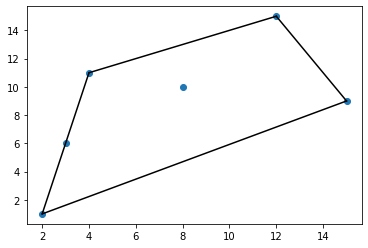

In [7]:
hull = ConvexHull(points2)


plt.plot(points2[:,0], points2[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(points2[simplex, 0], points2[simplex, 1], 'k-')

print(hull.simplices)